In [278]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# heatmap analysis. How similar are websites

In [255]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

In [256]:
# set the colormap and centre the colorbar
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [257]:
big_df = pd.read_csv("../../inflammatory_fakenix/concated.csv")
body_dict, relevant_index = pickle.load(open("../../inflammatory_fakenix/theta/relevant_bigdf_index.p", "rb"))
big_df = big_df.loc[relevant_index]

as_df_rnix = pd.read_csv("pred_alpha_rnix.csv")
ts_df_rnix = pd.read_csv("pred_theta_rnix.csv")

as_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_alpha_fakenix.csv")
ts_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_theta_fakenix.csv")

as_df_rnix.columns = ['RNIX_' + x for x in as_df_rnix.columns]
as_df_fakenix.columns = ['FAKENIX_' + x for x in as_df_fakenix.columns]

as_df = pd.concat([
    as_df_fakenix.iloc[:,1:],
    as_df_rnix,
    ], axis=1)

ts_df_rnix.columns = ['RNIX_' + x for x in ts_df_rnix.columns]
ts_df_fakenix.columns = ['FAKENIX_' + x for x in ts_df_fakenix.columns]

ts_df = pd.concat([
    ts_df_fakenix.iloc[:,1:],
    ts_df_rnix,
    ], axis=1)

as_df['class'] = big_df['class'].values
ts_df['class'] = big_df['class'].values

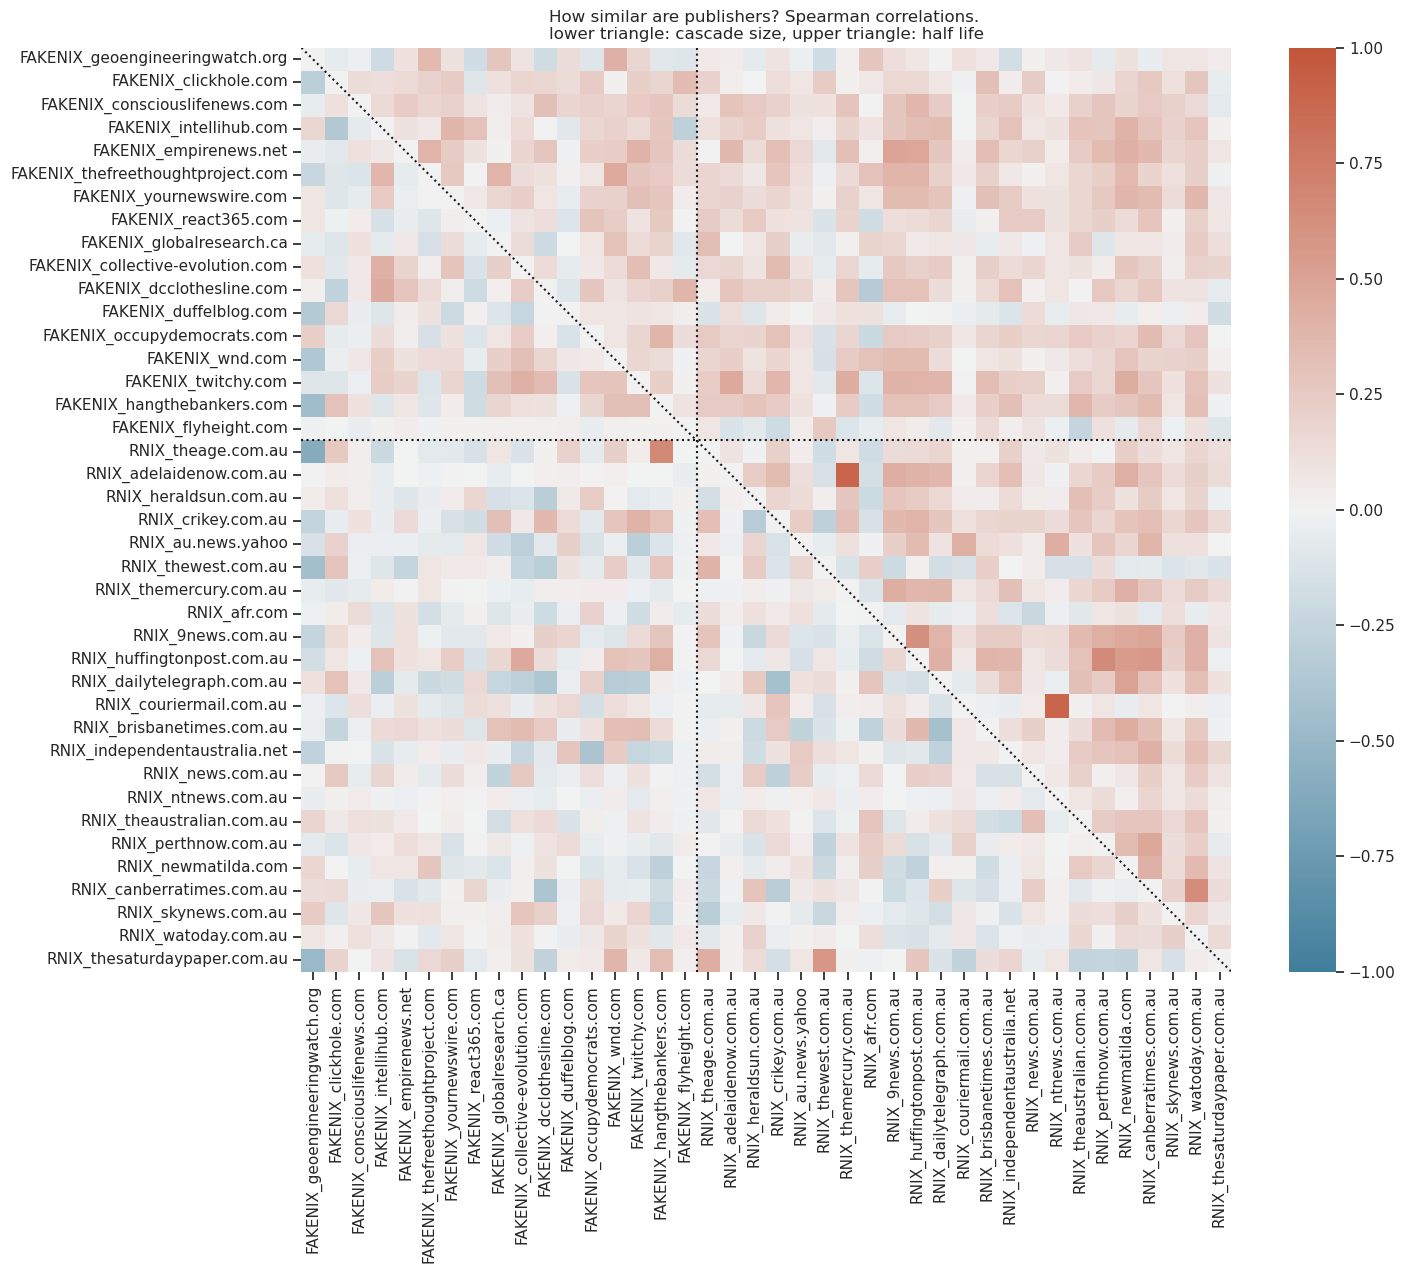

In [260]:
as_corr = as_df.iloc[:,:-1].corr(method='spearman')
as_mask = np.tril(np.ones_like(corr, dtype=bool))
ts_corr = ts_df.iloc[:,:-1].corr(method='spearman')
ts_mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,12))
sns.heatmap(as_corr*as_mask + ts_corr*ts_mask - 2*np.eye(len(as_corr)), xticklabels=True, yticklabels=True, cmap=cmap, mask=np.eye(len(as_corr)), norm=MidpointNormalize(midpoint=0,vmin=-1, vmax=1))
plt.vlines(17,0,40, color='k', ls=':')
plt.hlines(17,0,40, color='k', ls=':')
plt.plot(range(41), range(41), ls=':', color='k')
plt.title("How similar are publishers? Spearman correlations. \nlower triangle: cascade size, upper triangle: half life")
plt.savefig("heatmaps/similarpublisher_ALL.png", bbox_inches='tight')

In [261]:
print("FAKENIX ", np.nanmedian(as_corr.iloc[:17,:17] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,:17], dtype=bool))))
print("RNIX ", np.nanmedian(as_corr.iloc[17:,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:23,:23], dtype=bool))))
print("CROSS ", np.nanmedian(as_corr.iloc[:17,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,17:], dtype=bool))))

FAKENIX  0.020725889720470934
RNIX  0.008140371612346325
CROSS  0.008069027325476246


In [262]:
print("FAKENIX ", np.nanmedian(ts_corr.iloc[:17,:17] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,:17], dtype=bool))))
print("RNIX ", np.nanmedian(ts_corr.iloc[17:,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:23,:23], dtype=bool))))
print("CROSS ", np.nanmedian(ts_corr.iloc[:17,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,17:], dtype=bool))))

FAKENIX  0.13809185903321197
RNIX  0.14009196025149614
CROSS  0.128469922316132


In [263]:
as_df.to_csv("combined_analysis.csv", index=False)

# only on inflammatory

In [264]:
as_df = as_df[as_df['class'] != 0]
ts_df = ts_df[ts_df['class'] != 0]

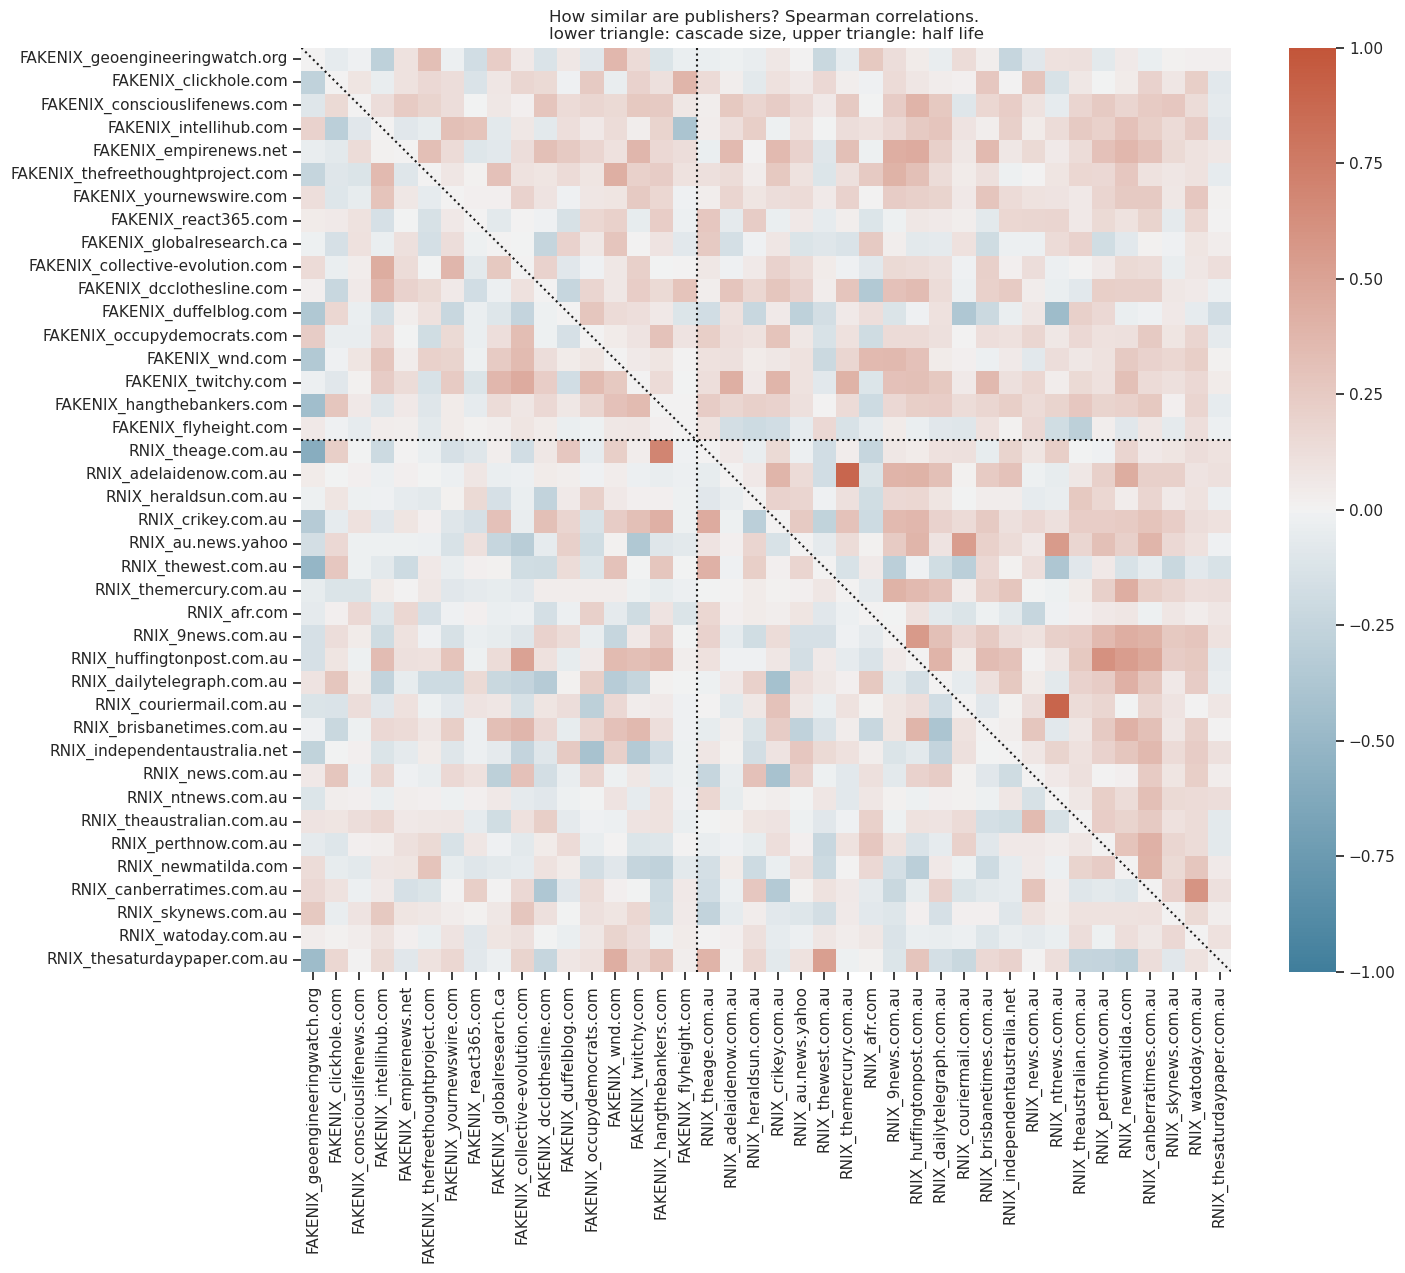

In [265]:
as_corr = as_df.iloc[:,:-1].corr(method='spearman')
as_mask = np.tril(np.ones_like(corr, dtype=bool))
ts_corr = ts_df.iloc[:,:-1].corr(method='spearman')
ts_mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,12))
sns.heatmap(as_corr*as_mask + ts_corr*ts_mask - 2*np.eye(len(as_corr)), xticklabels=True, yticklabels=True, cmap=cmap, mask=np.eye(len(as_corr)), norm=MidpointNormalize(midpoint=0,vmin=-1, vmax=1))
plt.vlines(17,0,40, color='k', ls=':')
plt.hlines(17,0,40, color='k', ls=':')
plt.plot(range(41), range(41), ls=':', color='k')
plt.title("How similar are publishers? Spearman correlations. \nlower triangle: cascade size, upper triangle: half life")
plt.savefig("heatmaps/similarpublisher_NONNEUTRAL.png", bbox_inches='tight')

In [266]:
print("FAKENIX ", np.nanmedian(as_corr.iloc[:17,:17] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,:17], dtype=bool))))
print("RNIX ", np.nanmedian(as_corr.iloc[17:,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:23,:23], dtype=bool))))
print("CROSS ", np.nanmedian(as_corr.iloc[:17,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,17:], dtype=bool))))

FAKENIX  0.03185633828683369
RNIX  0.00886635252959032
CROSS  0.013364120536875777


In [267]:
print("FAKENIX ", np.nanmedian(ts_corr.iloc[:17,:17] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,:17], dtype=bool))))
print("RNIX ", np.nanmedian(ts_corr.iloc[17:,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:23,:23], dtype=bool))))
print("CROSS ", np.nanmedian(ts_corr.iloc[:17,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,17:], dtype=bool))))

FAKENIX  0.08901149354922636
RNIX  0.11948597868617458
CROSS  0.09641139050009437


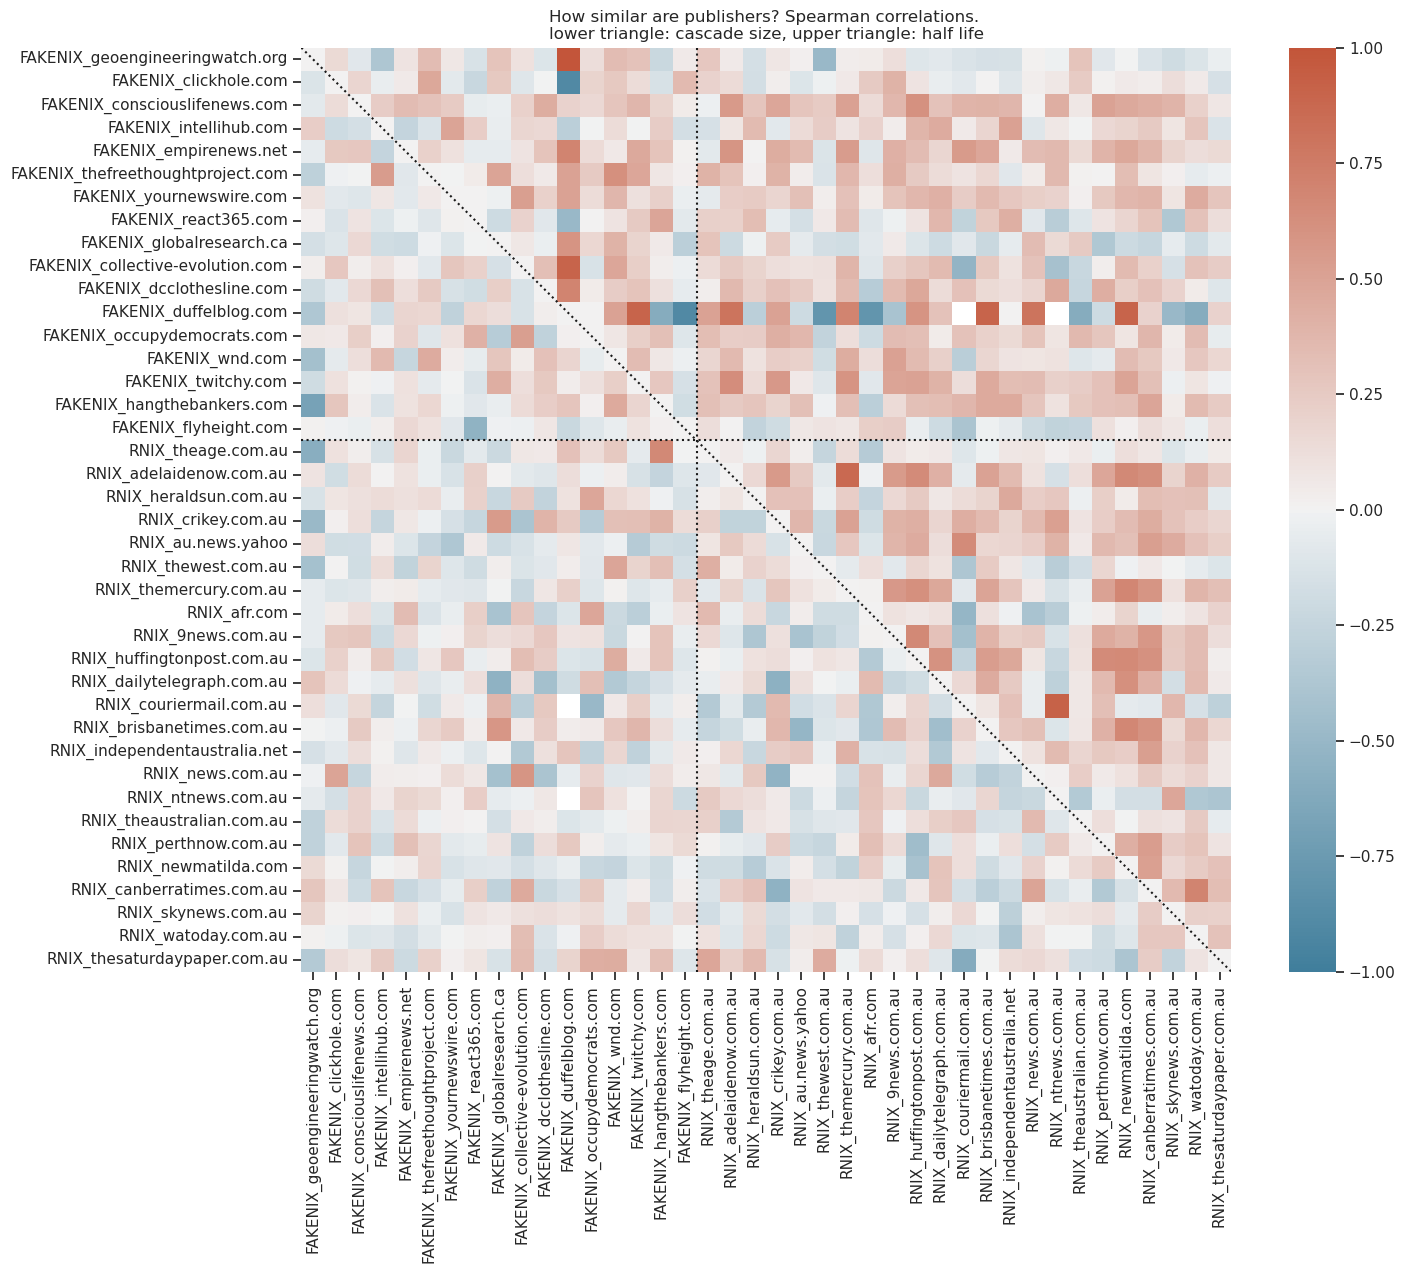

In [268]:
as_df = as_df[as_df['class'].map(lambda x: x not in [0,1])]
ts_df = ts_df[ts_df['class'].map(lambda x: x not in [0,1])]

as_corr = as_df.iloc[:,:-1].corr(method='spearman')
as_mask = np.tril(np.ones_like(corr, dtype=bool))
ts_corr = ts_df.iloc[:,:-1].corr(method='spearman')
ts_mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,12))
sns.heatmap(as_corr*as_mask + ts_corr*ts_mask - 2*np.eye(len(as_corr)), xticklabels=True, yticklabels=True, cmap=cmap, mask=np.eye(len(as_corr)), norm=MidpointNormalize(midpoint=0,vmin=-1, vmax=1))
plt.vlines(17,0,40, color='k', ls=':')
plt.hlines(17,0,40, color='k', ls=':')
plt.plot(range(41), range(41), ls=':', color='k')
plt.title("How similar are publishers? Spearman correlations. \nlower triangle: cascade size, upper triangle: half life")
plt.savefig("heatmaps/similarpublisher_INFLAMMATORY.png", bbox_inches='tight')

In [269]:
print("FAKENIX ", np.nanmedian(as_corr.iloc[:17,:17] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,:17], dtype=bool))))
print("RNIX ", np.nanmedian(as_corr.iloc[17:,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:23,:23], dtype=bool))))
print("CROSS ", np.nanmedian(as_corr.iloc[:17,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,17:], dtype=bool))))

FAKENIX  0.020035622552330733
RNIX  -0.0006587615283267457
CROSS  0.01798418972332016


In [270]:
print("FAKENIX ", np.nanmedian(ts_corr.iloc[:17,:17] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,:17], dtype=bool))))
print("RNIX ", np.nanmedian(ts_corr.iloc[17:,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:23,:23], dtype=bool))))
print("CROSS ", np.nanmedian(ts_corr.iloc[:17,17:] + np.tril(np.nan*np.ones_like(as_corr.iloc[:17,17:], dtype=bool))))

FAKENIX  0.12384716732542819
RNIX  0.17470355731225296
CROSS  0.127931488801054


# Who is the best publisher for content?

In [571]:
big_df = pd.read_csv("../../inflammatory_fakenix/concated.csv")
body_dict, relevant_index = pickle.load(open("../../inflammatory_fakenix/theta/relevant_bigdf_index.p", "rb"))
big_df = big_df.loc[relevant_index]

as_df_rnix = pd.read_csv("pred_alpha_rnix.csv")
ts_df_rnix = pd.read_csv("pred_theta_rnix.csv")

as_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_alpha_fakenix.csv")
ts_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_theta_fakenix.csv")

as_df_rnix.columns = ['RNIX_' + x for x in as_df_rnix.columns]
as_df_fakenix.columns = ['FAKENIX_' + x for x in as_df_fakenix.columns]

as_df = pd.concat([
    as_df_fakenix.iloc[:,1:],
    as_df_rnix,
    ], axis=1)

ts_df_rnix.columns = ['RNIX_' + x for x in ts_df_rnix.columns]
ts_df_fakenix.columns = ['FAKENIX_' + x for x in ts_df_fakenix.columns]

ts_df = pd.concat([
    ts_df_fakenix.iloc[:,1:],
    ts_df_rnix,
    ], axis=1)

as_ss = StandardScaler()
ts_ss = StandardScaler()

m = ts_df.replace(np.inf, 0).max().max()
ts_df =ts_df.replace(np.inf,m)



In [572]:
as_best_df = as_df.idxmax(axis=1)
ts_best_df = ts_df.idxmax(axis=1)

as_best_df = as_best_df.map(lambda x: x.split("_")[0])
ts_best_df = ts_best_df.map(lambda x: x.split("_")[0])

In [573]:
# as_df['class'] = big_df['class'].values
# ts_df['class'] = big_df['class'].values

In [574]:
best_df = pd.concat(
    [as_best_df, 
     ts_best_df,
    pd.Series(big_df['class'].values)]
, axis=1)
best_df.columns = ['alpha', 'theta', 'class']

In [575]:
best_df['class'] = best_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )

<AxesSubplot:xlabel='class'>

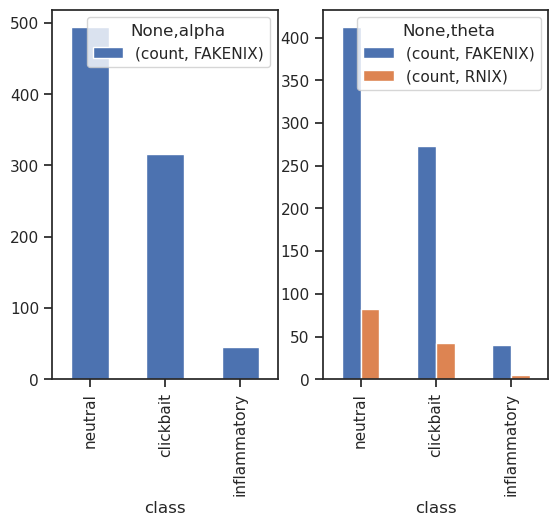

In [576]:
plt.subplot(1,2,1)
pd.pivot_table(best_df.groupby('class', as_index = False)['alpha'].value_counts(), columns='alpha', index='class').loc[['neutral', 'clickbait', 'inflammatory']].plot.bar(ax=plt.gca())

plt.subplot(1,2,2)
pd.pivot_table(best_df.groupby('class', as_index = False)['theta'].value_counts(), columns='theta', index='class').loc[['neutral', 'clickbait', 'inflammatory']].plot.bar(ax=plt.gca())


# WITH NORMALIZA

In [577]:
big_df = pd.read_csv("../../inflammatory_fakenix/concated.csv")
body_dict, relevant_index = pickle.load(open("../../inflammatory_fakenix/theta/relevant_bigdf_index.p", "rb"))
big_df = big_df.loc[relevant_index]

as_df_rnix = pd.read_csv("pred_alpha_rnix.csv")
ts_df_rnix = pd.read_csv("pred_theta_rnix.csv")

as_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_alpha_fakenix.csv")
ts_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_theta_fakenix.csv")

as_df_rnix.columns = ['RNIX_' + x for x in as_df_rnix.columns]
as_df_fakenix.columns = ['FAKENIX_' + x for x in as_df_fakenix.columns]

as_df = pd.concat([
    as_df_fakenix.iloc[:,1:],
    as_df_rnix,
    ], axis=1)

ts_df_rnix.columns = ['RNIX_' + x for x in ts_df_rnix.columns]
ts_df_fakenix.columns = ['FAKENIX_' + x for x in ts_df_fakenix.columns]

ts_df = pd.concat([
    ts_df_fakenix.iloc[:,1:],
    ts_df_rnix,
    ], axis=1)

as_ss = StandardScaler()
ts_ss = StandardScaler()

m = ts_df.replace(np.inf, 0).max().max()
ts_df =ts_df.replace(np.inf,m)



In [578]:
as_df = pd.DataFrame(as_ss.fit_transform(as_df), columns = as_df.columns)
ts_df = pd.DataFrame(ts_ss.fit_transform(ts_df), columns = ts_df.columns)

In [579]:
as_best_df = as_df.idxmax(axis=1)
ts_best_df = ts_df.idxmax(axis=1)

as_best_df = as_best_df.map(lambda x: x.split("_")[0])
ts_best_df = ts_best_df.map(lambda x: x.split("_")[0])

In [580]:
# as_df['class'] = big_df['class'].values
# ts_df['class'] = big_df['class'].values

In [581]:
best_df = pd.concat(
    [as_best_df, 
     ts_best_df,
    pd.Series(big_df['class'].values)]
, axis=1)
best_df.columns = ['alpha', 'theta', 'class']

In [582]:
best_df['class'] = best_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )

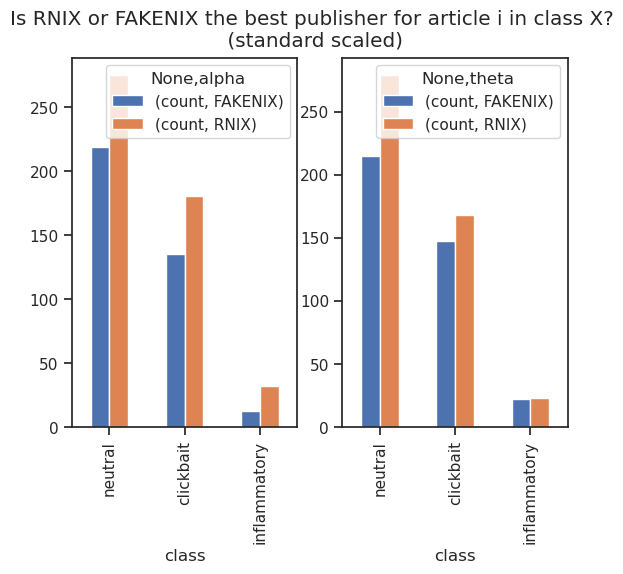

In [583]:
plt.suptitle("Is RNIX or FAKENIX the best publisher for article i in class X?\n (standard scaled)")
plt.subplot(1,2,1)
pd.pivot_table(best_df.groupby('class', as_index = False)['alpha'].value_counts(), columns='alpha', index='class').loc[['neutral', 'clickbait', 'inflammatory']].plot.bar(ax=plt.gca())

plt.subplot(1,2,2)
pd.pivot_table(best_df.groupby('class', as_index = False)['theta'].value_counts(), columns='theta', index='class').loc[['neutral', 'clickbait', 'inflammatory']].plot.bar(ax=plt.gca())
plt.savefig("heatmaps/rnix_or_fakenix.png", bbox_inches='tight')

## median instead of argmax

In [601]:
best_df = pd.concat(
    [(as_df[[x for x in as_df.columns if 'FAKENIX' in x]].mean(axis=1) > as_df[[x for x in as_df.columns if 'RNIX' in x]].mean(axis=1)).astype(int).map(lambda x: 'FAKENIX' if x==1 else 'RNIX'), 
     (ts_df[[x for x in ts_df.columns if 'FAKENIX' in x]].mean(axis=1) > as_df[[x for x in ts_df.columns if 'RNIX' in x]].mean(axis=1)).astype(int).map(lambda x: 'FAKENIX' if x==1 else 'RNIX'),
    pd.Series(big_df['class'].values)]
, axis=1)
best_df.columns = ['alpha', 'theta', 'class']

In [602]:
best_df['class'] = best_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )

<AxesSubplot:xlabel='class'>

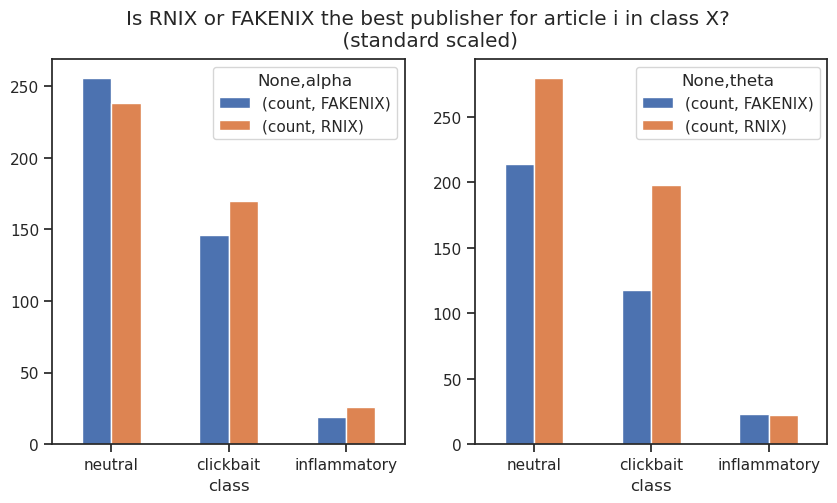

In [609]:
plt.figure(figsize=(10,5))
plt.suptitle("Is RNIX or FAKENIX the best publisher for article i in class X?\n (standard scaled)")
plt.subplot(1,2,1)
pd.pivot_table(best_df.groupby('class', as_index = False)['alpha'].value_counts(), columns='alpha', index='class').loc[['neutral', 'clickbait', 'inflammatory']].plot.bar(ax=plt.gca(), rot=0)

plt.subplot(1,2,2)
pd.pivot_table(best_df.groupby('class', as_index = False)['theta'].value_counts(), columns='theta', index='class').loc[['neutral', 'clickbait', 'inflammatory']].plot.bar(ax=plt.gca(),rot=0)
# plt.savefig("heatmaps/rnix_or_fakenix.png", bbox_inches='tight')

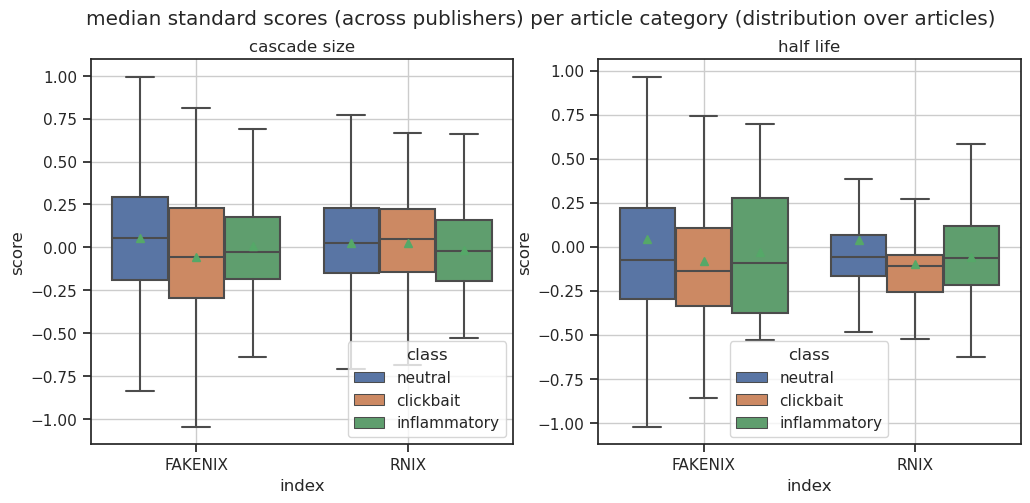

In [682]:
plt.figure(figsize=(12,5))
plt.suptitle("median standard scores (across publishers) per article category (distribution over articles)")
plt.subplot(1,2,1)

xx=pd.DataFrame(as_df[[x for x in as_df.columns if 'RNIX' in x]].median(axis=1)).copy()
xx.columns=['score']
xx['index']='RNIX'
xx['class']=pd.Series(big_df['class'].values)

yy=pd.DataFrame(as_df[[x for x in as_df.columns if 'FAKENIX' in x]].median(axis=1)).copy()
yy.columns=['score']
yy['index']='FAKENIX'
yy['class']=pd.Series(big_df['class'].values)

av_effect = pd.concat([yy,xx], axis=0)
av_effect['class']=av_effect['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )

sns.boxplot(
    hue = av_effect['class'],
    y = av_effect['score'],
    x = av_effect['index'], showfliers=False,ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory']
)
plt.title("cascade size")
# plt.ylabel("probability that article\nperforms better than average")
plt.grid()

plt.subplot(1,2,2)
xx=pd.DataFrame(ts_df[[x for x in ts_df.columns if 'RNIX' in x]].median(axis=1)).copy()
xx.columns=['score']
xx['index']='RNIX'
xx['class']=pd.Series(big_df['class'].values)

yy=pd.DataFrame(ts_df[[x for x in ts_df.columns if 'FAKENIX' in x]].median(axis=1)).copy()
yy.columns=['score']
yy['index']='FAKENIX'
yy['class']=pd.Series(big_df['class'].values)

av_effect = pd.concat([yy,xx], axis=0)
av_effect['class']=av_effect['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )

sns.boxplot(
    hue = av_effect['class'],
    y = av_effect['score'],
    x = av_effect['index'], showfliers=False,ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory'],
)
plt.title("half life")
# plt.ylabel("probability that article\nperforms better than average")
plt.grid()

plt.savefig("heatmaps/median_standard_scores.png", bbox_inches='tight')

# DOES CLICKBAIT ARTICLE PERFORM BETTER THAN NORMAL?

In [627]:
big_df = pd.read_csv("../../inflammatory_fakenix/concated.csv")
body_dict, relevant_index = pickle.load(open("../../inflammatory_fakenix/theta/relevant_bigdf_index.p", "rb"))
big_df = big_df.loc[relevant_index]

as_df_rnix = pd.read_csv("pred_alpha_rnix.csv")
ts_df_rnix = pd.read_csv("pred_theta_rnix.csv")

as_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_alpha_fakenix.csv")
ts_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_theta_fakenix.csv")

as_df_rnix.columns = ['RNIX_' + x for x in as_df_rnix.columns]
as_df_fakenix.columns = ['FAKENIX_' + x for x in as_df_fakenix.columns]

as_df = pd.concat([
    as_df_fakenix.iloc[:,1:],
    as_df_rnix,
    ], axis=1)

ts_df_rnix.columns = ['RNIX_' + x for x in ts_df_rnix.columns]
ts_df_fakenix.columns = ['FAKENIX_' + x for x in ts_df_fakenix.columns]

ts_df = pd.concat([
    ts_df_fakenix.iloc[:,1:],
    ts_df_rnix,
    ], axis=1)

as_ss = StandardScaler()
ts_ss = StandardScaler()

m = ts_df.replace(np.inf, 0).max().max()
ts_df =ts_df.replace(np.inf,m)

as_df = pd.DataFrame(as_ss.fit_transform(as_df), columns = as_df.columns)
ts_df = pd.DataFrame(ts_ss.fit_transform(ts_df), columns = ts_df.columns)

In [628]:
as_df_bool = as_df.applymap(lambda x: int(x>0))
ts_df_bool = ts_df.applymap(lambda x: int(x>0))

In [629]:
as_df_bool['class'] = pd.Series(big_df['class'].values)
ts_df_bool['class'] = pd.Series(big_df['class'].values)

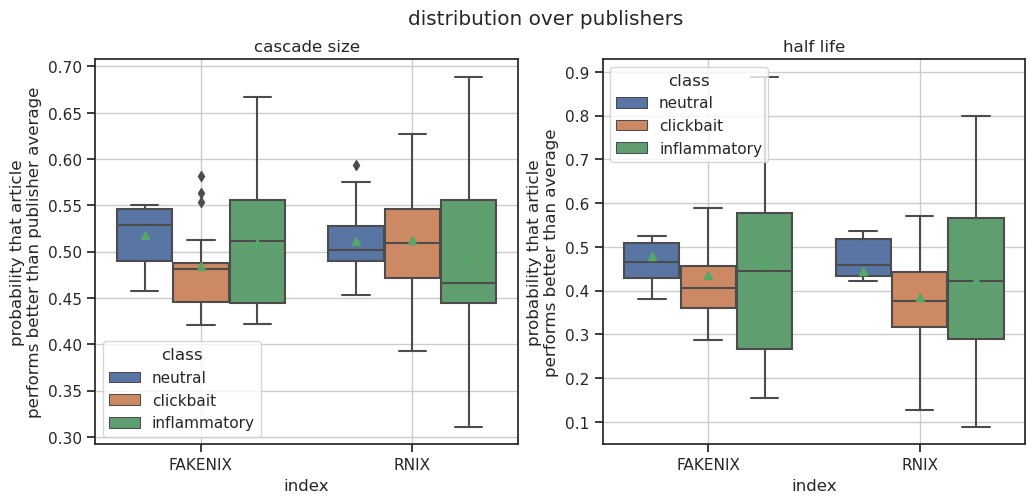

In [713]:
as_classes = []
for clas in [0,1,2]:
    as_class = as_df_bool[as_df_bool['class']==clas].mean(axis=0)
    as_class.index = [x.split('_')[0] for x in as_class.index]
    
    as_class = as_class.reset_index()
    as_class['class'] = clas
    as_classes.append(as_class)
as_class_df= pd.concat(as_classes, axis=0)
as_class_df = as_class_df[as_class_df['index']!='class']

as_class_df['class'] = as_class_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )


as_class_df_collector = []

plt.figure(figsize=(12,5))
plt.suptitle("distribution over publishers")
plt.subplot(1,2,1)
sns.boxplot(
    hue = as_class_df['class'],
    y = as_class_df[0],
    x = as_class_df['index'],ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory'])
plt.title("cascade size")
plt.ylabel("probability that article\nperforms better than publisher average")
plt.grid()

as_class_df_collector.append(as_class_df)

as_classes = []
for clas in [0,1,2]:
    as_class = ts_df_bool[ts_df_bool['class']==clas].mean(axis=0)
    as_class.index = [x.split('_')[0] for x in as_class.index]
    
    as_class = as_class.reset_index()
    as_class['class'] = clas
    as_classes.append(as_class)
as_class_df= pd.concat(as_classes, axis=0)
as_class_df = as_class_df[as_class_df['index']!='class']

as_class_df['class'] = as_class_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )
plt.subplot(1,2,2)
sns.boxplot(
    hue = as_class_df['class'],
    y = as_class_df[0],
    x = as_class_df['index'], showfliers=False,ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory'])
plt.title("half life")
plt.ylabel("probability that article\nperforms better than average")
plt.grid()

as_class_df_collector.append(as_class_df)

plt.savefig("heatmaps/probability_of_performing_better_than_publisher_average.png", bbox_inches='tight')

pickle.dump(as_class_df_collector, open("/home/pbcalder/Documents/analyse_bayesian/PERFORMANCE_PLOTTER/sec5.p","wb"))

In [ ]:
as_classes = []
for clas in [0,1,2]:
    as_class = as_df_bool[as_df_bool['class']==clas].mean(axis=0)
    as_class.index = [x.split('_')[0] for x in as_class.index]
    
    as_class = as_class.reset_index()
    as_class['class'] = clas
    as_classes.append(as_class)
as_class_df= pd.concat(as_classes, axis=0)
as_class_df = as_class_df[as_class_df['index']!='class']

as_class_df['class'] = as_class_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )

plt.figure(figsize=(12,5))
plt.suptitle("distribution over publishers")
plt.subplot(1,2,1)
sns.boxplot(
    hue = as_class_df['class'],
    y = as_class_df[0],
    x = as_class_df['index'],ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory'])
plt.title("cascade size")
plt.ylabel("probability that article\nperforms better than publisher average")
plt.grid()

as_classes = []
for clas in [0,1,2]:
    as_class = ts_df_bool[ts_df_bool['class']==clas].mean(axis=0)
    as_class.index = [x.split('_')[0] for x in as_class.index]
    
    as_class = as_class.reset_index()
    as_class['class'] = clas
    as_classes.append(as_class)
as_class_df= pd.concat(as_classes, axis=0)
as_class_df = as_class_df[as_class_df['index']!='class']

as_class_df['class'] = as_class_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )
plt.subplot(1,2,2)
sns.boxplot(
    hue = as_class_df['class'],
    y = as_class_df[0],
    x = as_class_df['index'], showfliers=False,ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory'])
plt.title("half life")
plt.ylabel("probability that article\nperforms better than average")
plt.grid()

plt.savefig("heatmaps/probability_of_performing_better_than_publisher_average.png", bbox_inches='tight')

0     CNIX
1     CNIX
2     CNIX
3     CNIX
4     CNIX
      ... 
35    RNIX
36    RNIX
37    RNIX
38    RNIX
39    RNIX
Name: index, Length: 120, dtype: object

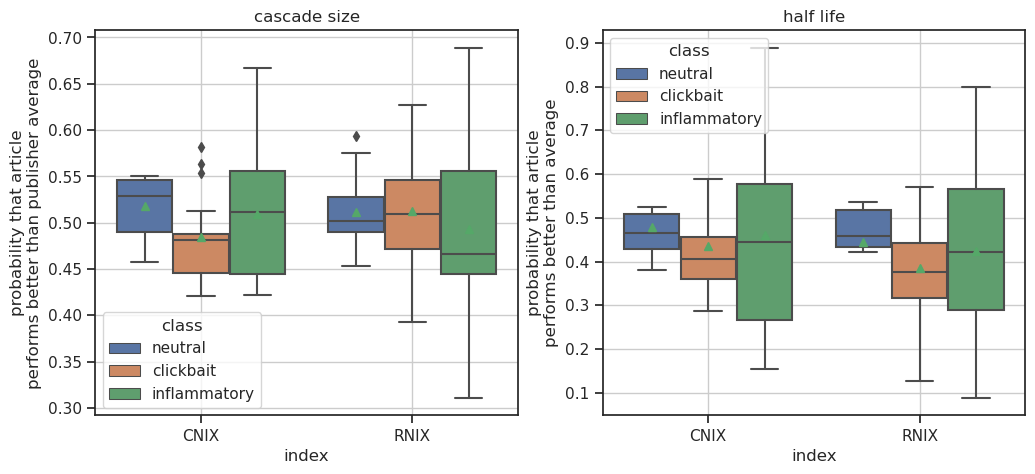

In [708]:
as_classes = []
for clas in [0,1,2]:
    as_class = as_df_bool[as_df_bool['class']==clas].mean(axis=0)
    as_class.index = [x.split('_')[0] for x in as_class.index]
    
    as_class = as_class.reset_index()
    as_class['class'] = clas
    as_classes.append(as_class)
as_class_df= pd.concat(as_classes, axis=0)
as_class_df = as_class_df[as_class_df['index']!='class']

as_class_df['class'] = as_class_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )

as_class_df['index']=as_class_df['index'].map({'FAKENIX': 'CNIX', 'RNIX':'RNIX'})
plt.figure(figsize=(12,5))
# plt.suptitle("distribution over publishers")
plt.subplot(1,2,1)
sns.boxplot(
    hue = as_class_df['class'],
    y = as_class_df[0],
    x = as_class_df['index'],ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory'])
plt.title("cascade size")
plt.ylabel("probability that article\nperforms better than publisher average")
plt.grid()

as_classes = []
for clas in [0,1,2]:
    as_class = ts_df_bool[ts_df_bool['class']==clas].mean(axis=0)
    as_class.index = [x.split('_')[0] for x in as_class.index]
    
    as_class = as_class.reset_index()
    as_class['class'] = clas
    as_classes.append(as_class)
as_class_df= pd.concat(as_classes, axis=0)
as_class_df = as_class_df[as_class_df['index']!='class']

as_class_df['class'] = as_class_df['class'].map({
    0: 'neutral',
    1: 'clickbait', 
    2: 'inflammatory'
}
                    )
as_class_df['index']=as_class_df['index'].map({'FAKENIX': 'CNIX', 'RNIX':'RNIX'})
plt.subplot(1,2,2)
sns.boxplot(
    hue = as_class_df['class'],
    y = as_class_df[0],
    x = as_class_df['index'], showfliers=False,ax=plt.gca(), showmeans=True,
    hue_order=['neutral', 'clickbait', 'inflammatory'])
plt.title("half life")
plt.ylabel("probability that article\nperforms better than average")
plt.grid()

plt.savefig("heatmaps/21_probability_of_performing_better_than_publisher_average.png", bbox_inches='tight')

# RANKED LIST OF BEST ARTICLES FOR NEUTRAL, CLICKBAIT, INFLAMMATORY

In [688]:
big_df = pd.read_csv("../../inflammatory_fakenix/concated.csv")
body_dict, relevant_index = pickle.load(open("../../inflammatory_fakenix/theta/relevant_bigdf_index.p", "rb"))
big_df = big_df.loc[relevant_index]

as_df_rnix = pd.read_csv("pred_alpha_rnix.csv")
ts_df_rnix = pd.read_csv("pred_theta_rnix.csv")

as_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_alpha_fakenix.csv")
ts_df_fakenix = pd.read_csv("../../inflammatory_fakenix/theta/pred_theta_fakenix.csv")

as_df_rnix.columns = ['RNIX_' + x for x in as_df_rnix.columns]
as_df_fakenix.columns = ['FAKENIX_' + x for x in as_df_fakenix.columns]

as_df = pd.concat([
    as_df_fakenix.iloc[:,1:],
    as_df_rnix,
    ], axis=1)

ts_df_rnix.columns = ['RNIX_' + x for x in ts_df_rnix.columns]
ts_df_fakenix.columns = ['FAKENIX_' + x for x in ts_df_fakenix.columns]

ts_df = pd.concat([
    ts_df_fakenix.iloc[:,1:],
    ts_df_rnix,
    ], axis=1)

as_ss = StandardScaler()
ts_ss = StandardScaler()

m = ts_df.replace(np.inf, 0).max().max()
ts_df =ts_df.replace(np.inf,m)

as_df = pd.DataFrame(as_ss.fit_transform(as_df), columns = as_df.columns)
ts_df = pd.DataFrame(ts_ss.fit_transform(ts_df), columns = ts_df.columns)

In [689]:
as_df['class'] = pd.Series(big_df['class'].values)
ts_df['class'] = pd.Series(big_df['class'].values)

In [690]:
# as_df['class'] = as_df['class'].map(lambda x: 0 if x == 0 else 1)
# ts_df['class']= ts_df['class'].map(lambda x: 0 if x == 0 else 1)

In [695]:
websites_sorted = []
for clas in [0,1,2]:
    as_class = as_df[as_df['class']==clas].median(axis=0).iloc[:-1]
    websites_sorted.append(as_class)
websites_df_average_scores_alpha = pd.concat(websites_sorted, axis=1)
websites_df_average_scores_alpha.columns = ['neutral', 'clickbait', 'inflammatory']
websites_df_average_scores_alpha.sort_values("inflammatory", ascending=False)
websites_df_average_scores_alpha.to_csv("heatmaps/alpha_ranked_websites.csv")

In [696]:
websites_sorted = []
for clas in [0,1,2]:
    as_class = ts_df[ts_df['class']==clas].median(axis=0).iloc[:-1]
    websites_sorted.append(as_class)
websites_df_average_scores_theta = pd.concat(websites_sorted, axis=1)
websites_df_average_scores_theta.columns = ['neutral', 'clickbait', 'inflammatory']
websites_df_average_scores_theta.sort_values("inflammatory", ascending=False)
websites_df_average_scores_theta.to_csv("heatmaps/theta_ranked_websites.csv")

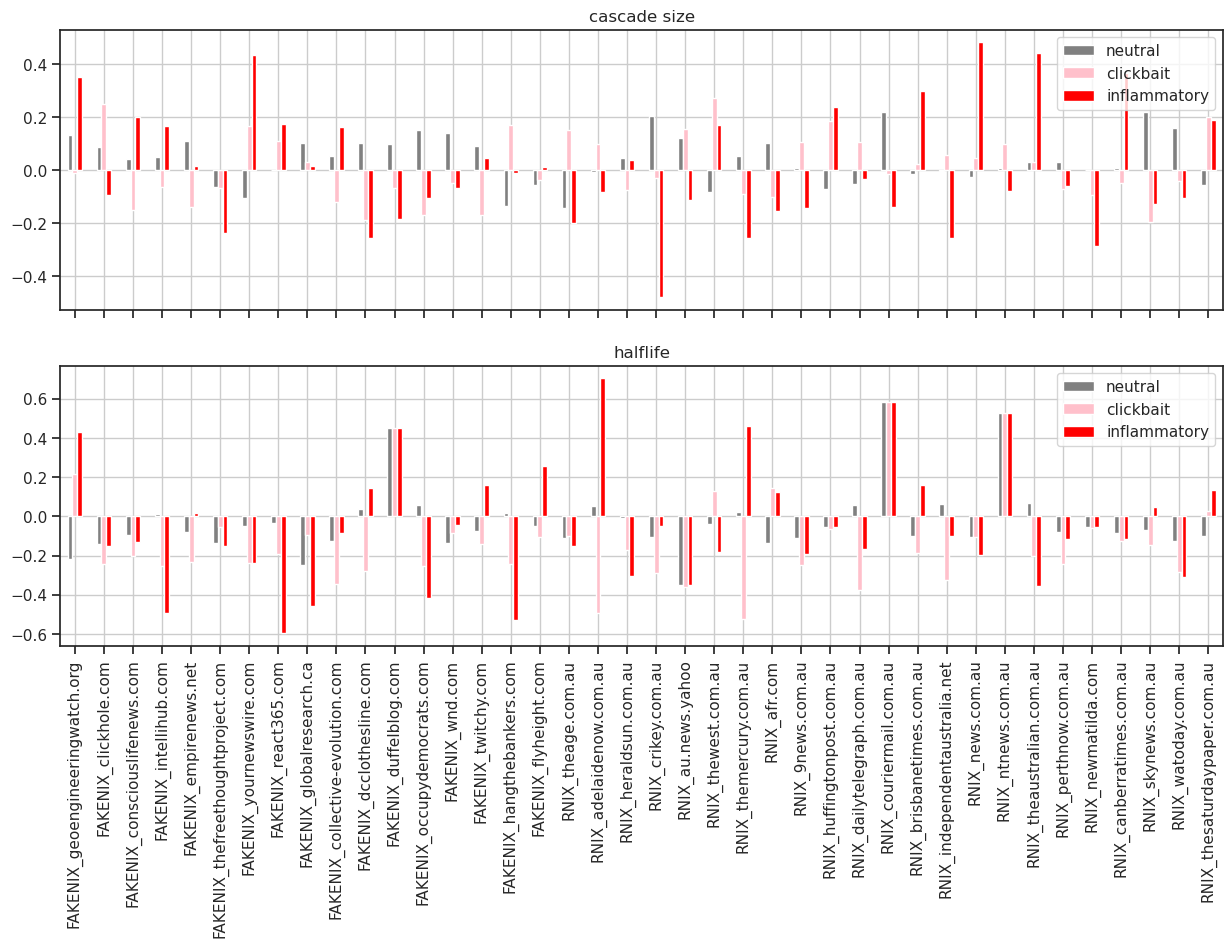

In [697]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
websites_df_average_scores_alpha.plot.bar(ax=plt.gca(), color=['gray', 'pink', 'red'])
plt.title("cascade size")
plt.xticks(range(40), []*40)
plt.grid()
plt.subplot(2,1,2)
plt.title("halflife")
websites_df_average_scores_theta.plot.bar(ax=plt.gca(), color=['gray', 'pink', 'red'])
plt.grid()

plt.savefig("heatmaps/ranked_websites.png", bbox_inches='tight')